In [1]:
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords
import openpyxl
import pandas as pd

In [2]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 

matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

## Import Data

In [3]:
wb = openpyxl.load_workbook('./insta_wordcloud.xlsx')

In [4]:
wcli = ['jmt','date','delicious','cafe','waiting']
df_insta = [0, 0, 0, 0, 0]
i = 0
for w in wcli:
    df_tmp = pd.read_excel('./insta_wordcloud.xlsx', sheet_name = w, 
                          dtype = {
                              'id':str,
                              'contents':str,
                              'time':str,
                              'loc':str,
                              'loc_cleaned':str
                          })
    df_insta[i] = df_tmp
    i += 1

In [5]:
li_insta = [0, 0, 0, 0, 0]
for i in range(0, 5):
    df_insta[i] = list(df_insta[i]['contents'])

## Morpheme Division

In [6]:
jmt = []
date = []
delic = []
cafe = []
wait = []
itr_li = [jmt, date, delic, cafe, wait]
tp_tmp = Twitter()

for i in range(0, 5):
    for df in df_insta[i]:
        itr_li[i].append(tp_tmp.pos(df))

/Users/onemonthtrip/opt/anaconda3/lib/python3.7/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


## Tag Selection

In [7]:
jmt_word = []
date_word = []
delic_word = []
cafe_word = []
wait_word = []
word_list = [jmt_word, date_word, delic_word, cafe_word, wait_word]

for i in range(0, 5):
    for sentence in itr_li[i]:
        for word,tag in sentence:
            if tag in ['Noun', 'Verb','VerbPrefix','Adjective', 'Hashtag']:
                word_list[i].append(word)

## Count Word

In [8]:
jmt_dic = dict()
date_dic = dict()
delic_dic = dict()
cafe_dic = dict()
wait_dic = dict()
count_dic = [jmt_dic, date_dic, delic_dic, cafe_dic, wait_dic]

for i in range(0, 5):
    count = Counter(word_list[i])
    count_dic[i] = dict(count.most_common())

## Word Cloud

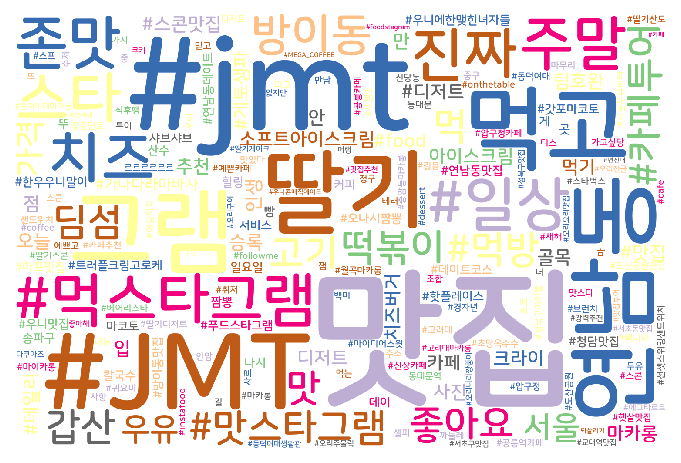

In [9]:
wordcloud = WordCloud(font_path = '../Users/onemonthtrip/Library/Fonts/NanumSquareRoundOTFB.otf', 
                      background_color='white',colormap = "Accent_r", 
                      width=1500, height=1000).generate_from_frequencies(count_dic[0]) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

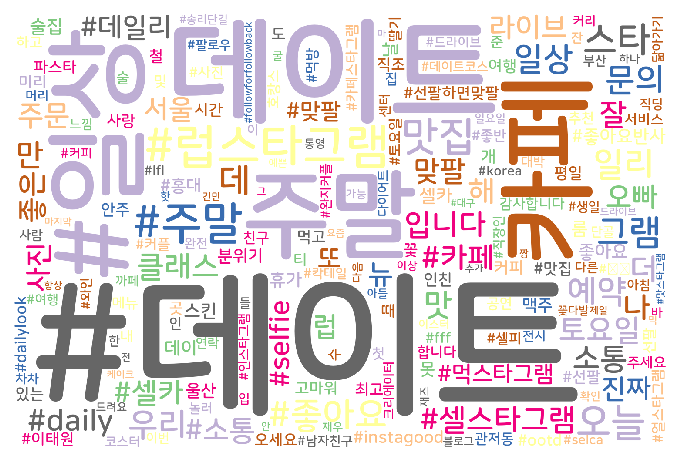

In [10]:
wordcloud = WordCloud(font_path = '../Users/onemonthtrip/Library/Fonts/NanumSquareRoundOTFB.otf', 
                      background_color='white',colormap = "Accent_r", 
                               width=1500, height=1000).generate_from_frequencies(count_dic[1]) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

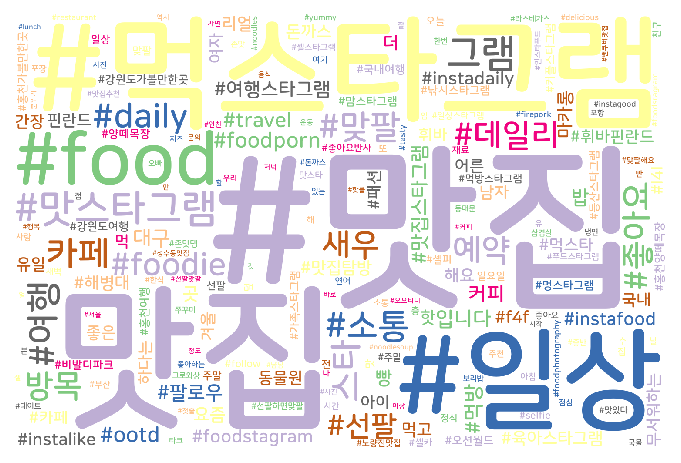

In [11]:
wordcloud = WordCloud(font_path = '../Users/onemonthtrip/Library/Fonts/NanumSquareRoundOTFB.otf', 
                      background_color='white',colormap = "Accent_r", 
                      width=1500, height=1000).generate_from_frequencies(count_dic[2]) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

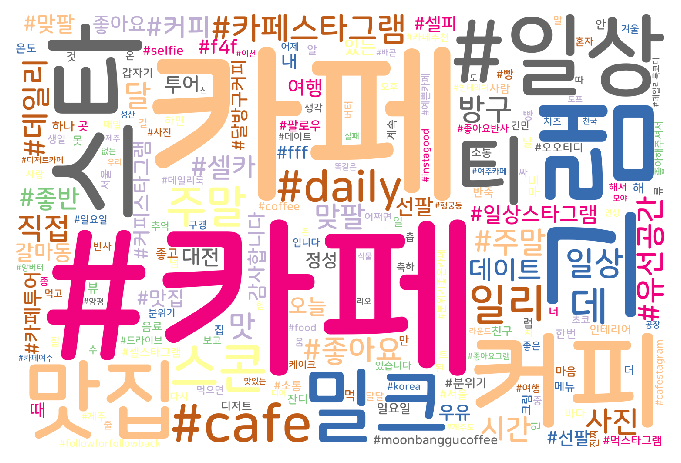

In [12]:
wordcloud = WordCloud(font_path = '../Users/onemonthtrip/Library/Fonts/NanumSquareRoundOTFB.otf', 
                      background_color='white',colormap = "Accent_r", 
                      width=1500, height=1000).generate_from_frequencies(count_dic[3]) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

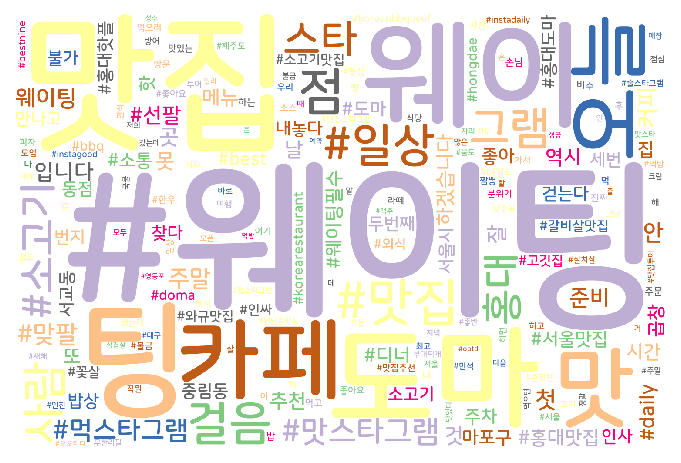

In [13]:
wordcloud = WordCloud(font_path = '../Users/onemonthtrip/Library/Fonts/NanumSquareRoundOTFB.otf', 
                      background_color='white',colormap = "Accent_r", 
                      width=1500, height=1000).generate_from_frequencies(count_dic[4]) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()